In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
from langdetect import detect
import os

In [ ]:
sets = ['google_data_first_sample.csv', 'google_data_last_sample.csv', 'app_sdk_sample.csv']
data_sets = []
for dataset in sets:
  path = os.path.join('data', dataset)
  df = pd.read_csv(path)
  data_sets.append(df)
google_first, google_last, app_sdk = data_sets

In [ ]:
pd.set_option('display.max_columns', None)
google_first.sample(n=5)

,Unnamed: 0,my_app_id,date_published,privacy_policy,rating_app,nb_rating,num_downloads,content_rating_app,developer,categ_app,in_app,has_ads,price_gplay,operating_system,software_version,interactive_element,in_app_product,developer_name,nb_screenshots,description,whats_new,email_to,developer_info,similar_apps_top15,visit_website,more_from_developer,family_library,permissions
94034,199931,com.creativetown.elegantdiyweddingcaketable,"November 28, 2017",https://docs.google.com/document/d/1mrIduWu_6u...,3.0,1,100+ >,PEGI 3 Learn More,Creativetown,Art & Design,False,True,0,4.0 and up,7.1,NaN,NaN,Creativetown,5.0,Elegantly Decorated Wedding Cake Table Display...,NaN,dewiintanjelita10@gmail.com,dewiintanjelita10@gmail.com Privacy Policy,"com.cocoplay.cakemaker, com.cake.browser, com....",NaN,"com.creativetown.jesuswallpapers, com.creative...",False,"read the contents of your USB storage, modif..."
90313,235130,com.elitech.pgw,"September 3, 2018",http://www.qq.com/privacy.htm,3.3,3,100+ >,PEGI 3 Learn More,JiangSu+JingChuang+Internet+Of,Tools,False,False,0,4.3 and up,2.3.2,NaN,NaN,JiangSu JingChuang Internet Of Things Technology,5.0,Wireless pressure Based on Bluetooth to remote...,NaN,gao746700783@gmail.com,Visit website gao746700783@gmail.com Pri...,"app.tools.soundmeter.decibel.noisedetector, ap...",http://www.e-elitech.cn,"com.elitech.smart.scales, com.ustcinfo.f.en, c...",False,"read sensitive log data, approximate locatio..."
27304,544886,com.teFood.TEFOODInternationalMobilAdmin,"February 23, 2018",https://tefoodint.com,5.0,1,10+,PEGI 3 Learn More,TE-FOOD,Business,False,False,0,4.1 and up,0.9.1,NaN,NaN,TE-FOOD,3.0,Manage and display your whole supply chain of ...,NaN,info@tefoodint.com,Visit website info@tefoodint.com Privacy...,th.berm.unliminet.ais,https://tefoodint.com,"com.teFood.livestockMobile, com.teltd.tefood.i...",False,"approximate location (network-based), precis..."
64845,513147,com.skycodetech.codingquiz,"September 4, 2018",NaN,4.4,117,"10,000+",PEGI 3 Learn More,7044571013168957413,Education,True,True,0,4.4 and up,2.0,Digital Purchases In-app Products,£1.59 per item,bitvale,12.0,With Coding Quiz you can test your knowledge o...,NaN,jquickapp@gmail.com,"jquickapp@gmail.com Russia, Kaliningrad regi...","com.sololearn, com.paprbit.dcoder, com.upskew....",NaN,NaN,False,"view network connections, full network acces..."
77040,95555,com.alexandresalou.dronesimulator2018,"September 1, 2017",https://alexandresalou.com/2017/09/01/privacy-...,3.4,220,"10,000+",PEGI 3 Learn More,5718244752627561944,Simulation,False,True,0,4.1 and up,1.0,NaN,NaN,Alexandre Salou,3.0,Drone Simulator 2018 is a remastered version o...,NaN,studio@gmail.com,Visit website forplayers.studio@gmail.com ...,com.sysreb.Amazing_Drones_Free_Flight_Simulato...,https://alexandresalou.com,NaN,False,"read the contents of your USB storage, modif..."


# Google Data Explanation
## Dataset Columns
Below are the columns contained in the dataset:

- `my_app_id`: Unique identifier of the app
- `date_published`: Date when the app is published
- `privacy_policy`: Web address for the app's privacy policy
- `rating_app`: Average rating of the app
- `nb_rating`: Number of ratings received by the app
- `num_downloads`: Number of app downloads, discretized in buckets
- `content_rating_app`: Age restriction of the app
- `developer`: Unique identifier of the app's developer
- `categ_app`: App category (including primary and/or secondary categories)
- `in_app`: Boolean indicator for in-app purchases
- `has_ads`: Boolean indicator for app ads
- `price_gplay`: Listed price of the app on Google Store
- `operating_system`: Required operating system versions
- `software_version`: Software version of the app (e.g., 1.2.0, 4.6)
- `interactive_element`: Interactive elements of the app
- `in_app_product`: Price range of in-app purchases
- `developer_name`: Name of the app's developer
- `nb_screenshots`: Number of screenshots available on Google Store
- `description`: Text of the app's description (basic text cleaning applied)
- `whats_new`: Text describing the app's updates
- `email_to`: Email address for reporting issues with the app
- `developer_info`: Developer information (may include email, address, or other text)
- `similar_apps_top15`: Top 15 apps similar to the app
- `visit_website`: Developer's website
- `more_from_developer`: Other apps by the same developer
- `family_library`: Boolean indicator for Family Library sharing
- `permissions`: Text containing the app's permissions

### SDK Dataset

Below are additional columns in the dataset related to SDK (Software Development Kit) information within each app:

- `present`: Indicator if the SDK is present in the app.
- `domains`: Software domain names associated with the SDK.
- `user_agents`: Browser's User Agent string, helping to identify the browser used for the app.
- `uninstall_date`: The date when the SDK is uninstalled from the app.
- `deactivation_date`: Date marking the SDK's deactivation in the app.
- `active`: Indicator if the SDK is currently active in the app.
- `id`: Unique identifier for each app.
- `activation_date`: Date when the SDK is activated within the app.
- `install_date`: Date recording the SDK's installation in the app.
- `sdk_name`: Name assigned to the SDK.
- `sdk_type`: Classification provided by the data provider, briefly describing the SDK's functionality.

### Understanding SDK Data
The above columns provide detailed information regarding the SDKs utilized within each app, offering insights into their presence, status (active or inactive), and various associated dates (installation, activation, deactivation, and uninstallation). The `sdk_type` further provides a concise description of each SDK's functionality.

# Demand based view
1. **What drives the new entrants within the saturated categories of the Google Play Store?**
    1. How to define saturated categories or market? (Do research on this)
        -   Number of downloads within category compared to the number of apps within the category
        -   Procentual change of number of apps within a year
    2. How to define new entrants?
        -   Looking at date published of app
        -   Looking at number of downloads
    3. Define the driving factors of the new entrants within the saturated markets
        -   Check what they have in common (for example: pricing, marketing efforts, app description)

In [ ]:
categ_app1 = google_first['categ_app'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
categ_app2 = google_last['categ_app'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

print(categ_app1.iloc[:5], '\n') # first dataset
print(categ_app2.iloc[:5])       # last dataset

categ_app
Education          9.3%
Entertainment      7.4%
Personalization    6.5%
Tools              6.4%
Lifestyle          6.1%
Name: proportion, dtype: object 

categ_app
Education          9.3%
Entertainment      5.7%
Personalization    5.6%
Lifestyle          5.4%
Tools              5.4%
Name: proportion, dtype: object


2. **Is the succes of apps demand based? Estimated from google trends**
    1. How to define the succes of an app?
        - Number of downloads
        - The rating
        - Number of ratings (positivism)
    2. What were the trends in the past timeframe of the datasets?
        - <u>Problem:</u> We do not have the timeframe of the datasets, so we can not determine the trends within that timeframe
        - <u>Solution:</u> We can assume that apps are released on a daily bases within the app store, for that reason we can argue that the max `date_published` of each dataset will represent the date of scraping them.
        - <u>Task:</u> Finding the hypes of 2018
    3. Define what a trend is based on the google data (are we looking at absolute number of google searches or are we looking for increases in number of searches compared to next year?)
    4. Find a way to link a trend to an app
    5. Refine research question: we are investigating that <u>if</u> an apps links to a certain hype, the $\Delta$ of downloads is higher of apps that do not link to a hype
    
    OR
    
    The similairity match percentage between an app and the hypes of the year 2018 has a positive effect on the number of downloads.
    
    **For the math wizards among us:**
    Does this have anything to do with Bayes?
    
    \begin{equation}
        P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
    \end{equation}

    A: the probability of match
    B: the probability of $\Delta$ increase in downloads


In [ ]:
# Change the data format of data_published to datetime
for df in [google_first, google_last]:
  df['date_published'] = df['date_published'].str.rstrip('</span')
  df['date_published_cleaned'] = pd.to_datetime(df['date_published'])
  df["date_published_cleaned"] = df["date_published_cleaned"].dt.strftime("%d-%m-%Y")


In [ ]:
print(f'Latest date of first dataset:\t\t{max(google_first["date_published_cleaned"])}')
print(f'Latest date of last dataset:\t\t  {max(google_last["date_published_cleaned"])}')
# meaning that we are looking at the year 2018

Latest date of first dataset:		31-12-2017
Latest date of last dataset:		  31-12-2018


3. **Can the performance of an app be explained by the yearly hypes?** *(About the same as the previous RQ)*
    1. How to define performance?
    2. Define what explained means

# Competitive strategy
1. **What is the effect of new entrants to existing apps?**
    1. Develop a way to target the new entrants
    2. Develop a way to target the competitors of new apps
        - (maybe: `similar_apps_top15`?)
    3. Define the possible effects/ responses of existing apps (by reading literature)
        - Did the developer bring new apps to the market?
        - Pricing strategies
        - Advertisement strategies
        - App policy
    4. Develop ways to measure the found effects between the two datasets
    5. See if the effects are statistically significant as opposed to apps that were <u>not</u> threatend by new entrants


2. **What are the most effective strategies/ business models within a specific category?**
    1. What defines a business model? (Use literature for this.)
    1. Define the variables that represent the business model of an app
    2. Run cluster analysis based on those variables within each category
    3. Define what an effective business model is
    4. Develop a way to measure the effectiveness of each cluster within that category
    5. Generalise and draw conclusions.

3. **How does strategy differ according to the size of the category?**
    1. How to measure the size of the category? Number of downloads within category, number of apps, price of the app multiplied by downloads?
    2. What defines a strategy? (Use literature to answer)
    3. Find variables that measure strategy
    4. Compare if there are significant differences between category sizes groups
    5. Describe the differences

> ***If you do not pay for the product, you are the product.”***
4. **What is the influence of app permission to the pricing strategy of the app?**
    1. Looking at literature: there must be plenty
        - Literature on privacy policies of apps
        - What information is nice to have about your user if you were an app developer?
    2. How to measure app permission?
        - What are the types of permissions?
        - Are all types of permissions equal to each other? Or should we give them a weight?
    3. Pricing strategy vs. free apps
        - <u>Very imporant when cleaning pricing variable: they used different currencies.</u>

5. **To what extent require free apps more permission of the user?**
    1. Find way to measure degree of permission -> possibly in literature
    2. Check if apps are really free -> possibly in app purchases
    3. Comparing groups: completely free apps, apps with in-app purchases and not-free app -> see if differences are statistically significant

             

In [ ]:
import random
random.seed(42)

google_first['permissions'] = google_first['permissions'].astype(str)

samples = random.sample(google_first.index.tolist(), 10)
for s in samples:
  permissions = google_first['permissions'][s]
  print(f'# Permissions: {len(permissions.split(","))}')
  print(permissions, '\n')

# Permissions: 9
find accounts on the device,   read the contents of your USB storage,   modify or delete the contents of your USB storage,   view network connections,   full network access,   run at startup,   use accounts on the device,   prevent device from sleeping,   receive data from Internet 

# Permissions: 4
read the contents of your USB storage,   modify or delete the contents of your USB storage,   control vibration,   prevent device from sleeping 

# Permissions: 4
precise location (GPS and network-based),   read the contents of your USB storage,   modify or delete the contents of your USB storage,   take pictures and videos 

# Permissions: 15
find accounts on the device,   approximate location (network-based),   precise location (GPS and network-based),   read the contents of your USB storage,   modify or delete the contents of your USB storage,   record audio,   view Wi-Fi connections,   read phone status and identity,   view network connections,   full network access,  

count    116385.000000
mean          7.168673
std           5.153742
min           1.000000
25%           3.000000
50%           6.000000
75%          10.000000
max         101.000000
Name: permissions_count, dtype: float64

count    126821.000000
mean          7.056505
std           4.893492
min           1.000000
25%           3.000000
50%           6.000000
75%          10.000000
max         101.000000
Name: permissions_count, dtype: float64



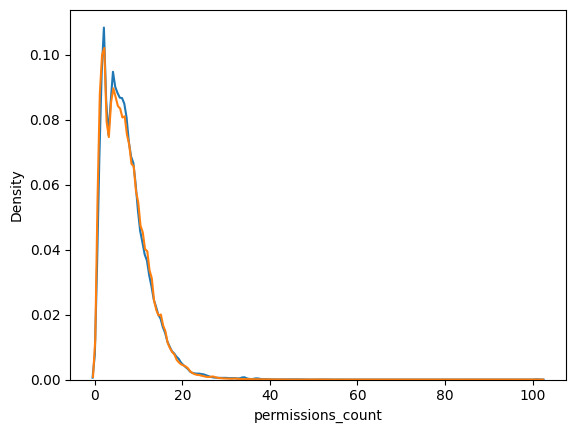

In [ ]:
# making new column for number of permissions
for set in [google_first, google_last]:
  set['permissions'] = set['permissions'].astype(str)
  set['permissions_count'] = set['permissions'].apply(lambda x: len(x.split(",")))

  # descriptive statistics for number of permissions
  print(set['permissions_count'].describe(), end='\n\n')

  # make kde plot for number of permissions
  sns.kdeplot(x='permissions_count', data=set, legend=True)

In [ ]:
google_first['price_gplay'].value_counts()

price_gplay
0          104135
£0.89         750
£0.99         404
£0.79         362
£0.59         356
            ...  
£3.34           1
£8.33           1
£269.99         1
£2.94           1
£2.60           1
Name: count, Length: 553, dtype: int64

count    116385.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: price_gplay, dtype: float64

count    126821.000000
mean         12.175427
std         164.799116
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       10000.000000
Name: price_gplay, dtype: float64



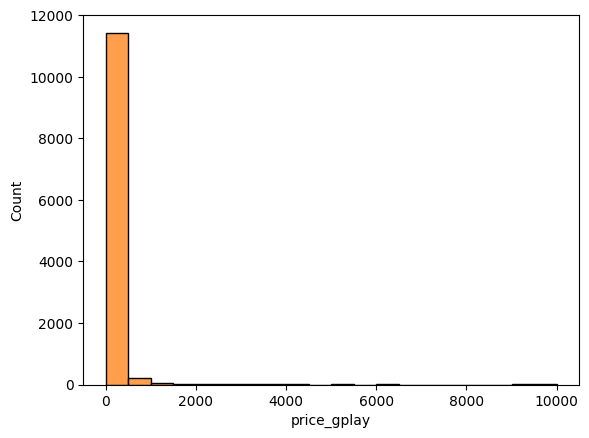

In [ ]:
"""
Code does not work since the format of the price is not consistent
Also different currencies are used
TODO: fix this AND convert the prices to the same currency using some python library
"""

def extract_price(x):

  if x == '0':
    return 0.0
  if x == 'nan':
    return 0.0

  import re
  pattern = r'\d+.\d{1,2}'
  price = re.match(pattern, x.strip())
  if price:
    price = price.group(0)
    price = price.replace(',', '.')
    return float(price)
  else:
    return 0.0

for set in [google_first, google_last]:
  set['price_gplay'] = set['price_gplay'].astype(str)
  set['price_gplay'] = set['price_gplay'].apply(extract_price)
  set['price_gplay'] = set['price_gplay'].astype(float)

  # descriptive statistics for price
  print(set['price_gplay'].describe(), end='\n\n')

  # make hist plot for price
  x = set['price_gplay'][set['price_gplay'] > 0]
  sns.histplot(x=x, legend=True, bins=20)